# Implementing Gradient Descent from Scratch

In [92]:
# importing the flight dataset from the folder and the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\hasan\Downloads\datasets\datasets\flight_price_prediction.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [93]:
# dropping the flight column

df.drop("flight",axis=1,inplace=True)

In [94]:
# performing the label encoding for all the categorical column

cat_col=("airline","source_city","departure_time","stops","arrival_time","destination_city","class")
for i in cat_col:
    unique_value=df[i].unique()
    
    n=1
    for j in unique_value:
        df.loc[df[i]==j, i] = n
        n+=1
df.drop("Unnamed: 0",axis=1,inplace=True)

df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,1,1,1,1,1,1,2.17,1,5953
1,1,1,2,1,2,1,1,2.33,1,5953
2,2,1,2,1,3,1,1,2.17,1,5956
3,3,1,3,1,4,1,1,2.25,1,5955
4,3,1,3,1,2,1,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,3,6,3,2,5,4,2,10.08,49,69265
300149,3,6,4,2,1,4,2,10.42,49,77105
300150,3,6,2,2,1,4,2,13.83,49,79099
300151,3,6,2,2,5,4,2,10.00,49,81585


In [95]:
# Adding new feature to the dataset based on the previous data analysis which helped to improve the mse

df["stop_class_"]=df["stops"]*df["class"]
df["dur_stop_"]=np.log(df["duration"])*df["stops"]

df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,stop_class_,dur_stop_
0,1,1,1,1,1,1,1,2.17,1,5953,1,0.774727
1,1,1,2,1,2,1,1,2.33,1,5953,1,0.845868
2,2,1,2,1,3,1,1,2.17,1,5956,1,0.774727
3,3,1,3,1,4,1,1,2.25,1,5955,1,0.81093
4,3,1,3,1,2,1,1,2.33,1,5955,1,0.845868
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,3,6,3,2,5,4,2,10.08,49,69265,4,4.621107
300149,3,6,4,2,1,4,2,10.42,49,77105,4,4.687454
300150,3,6,2,2,1,4,2,13.83,49,79099,4,5.25368
300151,3,6,2,2,5,4,2,10.00,49,81585,4,4.60517


In [96]:
# converting different datatype like object to int for defined columns

cat_col=("duration","dur_stop_","stop_class_","airline","source_city","departure_time","stops","arrival_time","destination_city","class")

for i in cat_col:
    df[i] = df[i].astype("int")
df.dtypes

airline             int32
source_city         int32
departure_time      int32
stops               int32
arrival_time        int32
destination_city    int32
class               int32
duration            int32
days_left           int64
price               int64
stop_class_         int32
dur_stop_           int32
dtype: object

In [97]:
# defining the denormalization function for the price column to get the final number in the same range

price_max=df["price"].max()
price_min=df["price"].min()
def denorm(x):
    return (x * (price_max-price_min) + price_min)

In [98]:
# Normalizing the required column

independen_variable=["duration","days_left","price"]
for i in independen_variable:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
#df.drop(columns=["arrival_time","stops","destination_city","stop_class_"],inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,stop_class_,dur_stop_
0,1,1,1,1,1,1,1,0.040816,0.0,0.039749,1,0
1,1,1,2,1,2,1,1,0.040816,0.0,0.039749,1,0
2,2,1,2,1,3,1,1,0.040816,0.0,0.039773,1,0
3,3,1,3,1,4,1,1,0.040816,0.0,0.039765,1,0
4,3,1,3,1,2,1,1,0.040816,0.0,0.039765,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,3,6,3,2,5,4,2,0.204082,1.0,0.558844,4,4
300149,3,6,4,2,1,4,2,0.204082,1.0,0.623124,4,4
300150,3,6,2,2,1,4,2,0.265306,1.0,0.639473,4,5
300151,3,6,2,2,5,4,2,0.204082,1.0,0.659856,4,4


In [99]:
#df.drop(columns=["arrival_time","destination_city"],inplace=True)

In [100]:
# Taking Price at the target variable
# defining the train and test split function 

def train_test_split(df):
    train_index = np.random.rand(len(df)) < 0.8
    train_data = df[train_index]
    test_data = df[~train_index]
    train_x=train_data.drop("price",axis=1)
    test_x=test_data.drop("price",axis=1)
    train_y=train_data["price"]
    test_y=test_data["price"]
    return(train_x,train_y,test_x,test_y)

In [101]:
# printing the shape of train and test datasets

train_x,train_y,test_x,test_y=train_test_split(df)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(239751, 11)
(239751,)
(60402, 11)
(60402,)


In [102]:
class Ridge_GD:
    
    def __init__(self, itr, learning_rate,lamda):
        self.learning_rate = learning_rate
        self.itr = itr
        self.lamda=lamda
        self.weights = None
        self.losss = []
        self.we = []

    def loss(self,test_x,test_y):
        predicted=self.predict(test_x)
        mse=.5*np.mean((test_y-predicted)**2) + ((self.lamda/2)*(np.dot(self.weights.T,self.weights)))
        return mse


    def gradient_descent(self,x_train,train_y, y_predicted):
        delta = y_predicted- train_y
        dW=(2*(np.dot(x_train.T,delta)) + (2*self.lamda*self.weights))/x_train.shape[0]
        return (dW)

    def fit(self, x_train, train_y):
        self.weights=np.ones(x_train.shape[1])
        for i in range(self.itr):
            z = np.dot(x_train,self.weights.T) 
            y_predicted= z
            dW= self.gradient_descent(x_train,train_y, y_predicted)
            self.weights=self.weights-(self.learning_rate*dW)
            loss=self.loss(x_train, train_y)
            
            self.losss.append(loss)
            print(f"For Iteration {i} the Loss is {round(self.losss[i],4)}.")
            self.we.append(self.weights)

    def predict(self, x_train):
        z=np.dot(x_train,self.weights.T)
        y_predicted=z
        
            
        return(y_predicted)



In [103]:
from datetime import datetime
start_time = datetime.now()

model_Ridgegd=Ridge_GD(lamda=.01,itr=4000, learning_rate=.001)
model_Ridgegd.fit(train_x,train_y)

# predicting the test_y
model_Ridgegd.predict(test_x)

# getting the test error
model_Ridgegd.loss(test_x,test_y)

end_time = datetime.now()


For Iteration 0 the Loss is 255.5171.
For Iteration 1 the Loss is 174.2093.
For Iteration 2 the Loss is 118.7978.
For Iteration 3 the Loss is 81.0347.
For Iteration 4 the Loss is 55.2989.
For Iteration 5 the Loss is 37.7596.
For Iteration 6 the Loss is 25.8063.
For Iteration 7 the Loss is 17.6598.
For Iteration 8 the Loss is 12.1076.
For Iteration 9 the Loss is 8.3234.
For Iteration 10 the Loss is 5.7442.
For Iteration 11 the Loss is 3.9861.
For Iteration 12 the Loss is 2.7876.
For Iteration 13 the Loss is 1.9705.
For Iteration 14 the Loss is 1.4133.
For Iteration 15 the Loss is 1.0332.
For Iteration 16 the Loss is 0.7738.
For Iteration 17 the Loss is 0.5967.
For Iteration 18 the Loss is 0.4757.
For Iteration 19 the Loss is 0.3929.
For Iteration 20 the Loss is 0.3362.
For Iteration 21 the Loss is 0.2972.
For Iteration 22 the Loss is 0.2703.
For Iteration 23 the Loss is 0.2516.
For Iteration 24 the Loss is 0.2386.
For Iteration 25 the Loss is 0.2294.
For Iteration 26 the Loss is 0.2228.

For Iteration 222 the Loss is 0.1087.
For Iteration 223 the Loss is 0.1084.
For Iteration 224 the Loss is 0.1082.
For Iteration 225 the Loss is 0.1079.
For Iteration 226 the Loss is 0.1077.
For Iteration 227 the Loss is 0.1074.
For Iteration 228 the Loss is 0.1072.
For Iteration 229 the Loss is 0.1069.
For Iteration 230 the Loss is 0.1067.
For Iteration 231 the Loss is 0.1064.
For Iteration 232 the Loss is 0.1062.
For Iteration 233 the Loss is 0.106.
For Iteration 234 the Loss is 0.1057.
For Iteration 235 the Loss is 0.1055.
For Iteration 236 the Loss is 0.1052.
For Iteration 237 the Loss is 0.105.
For Iteration 238 the Loss is 0.1048.
For Iteration 239 the Loss is 0.1045.
For Iteration 240 the Loss is 0.1043.
For Iteration 241 the Loss is 0.1041.
For Iteration 242 the Loss is 0.1038.
For Iteration 243 the Loss is 0.1036.
For Iteration 244 the Loss is 0.1034.
For Iteration 245 the Loss is 0.1032.
For Iteration 246 the Loss is 0.1029.
For Iteration 247 the Loss is 0.1027.
For Iteration 

For Iteration 439 the Loss is 0.0753.
For Iteration 440 the Loss is 0.0753.
For Iteration 441 the Loss is 0.0752.
For Iteration 442 the Loss is 0.0751.
For Iteration 443 the Loss is 0.075.
For Iteration 444 the Loss is 0.0749.
For Iteration 445 the Loss is 0.0748.
For Iteration 446 the Loss is 0.0747.
For Iteration 447 the Loss is 0.0746.
For Iteration 448 the Loss is 0.0746.
For Iteration 449 the Loss is 0.0745.
For Iteration 450 the Loss is 0.0744.
For Iteration 451 the Loss is 0.0743.
For Iteration 452 the Loss is 0.0742.
For Iteration 453 the Loss is 0.0741.
For Iteration 454 the Loss is 0.074.
For Iteration 455 the Loss is 0.074.
For Iteration 456 the Loss is 0.0739.
For Iteration 457 the Loss is 0.0738.
For Iteration 458 the Loss is 0.0737.
For Iteration 459 the Loss is 0.0736.
For Iteration 460 the Loss is 0.0735.
For Iteration 461 the Loss is 0.0734.
For Iteration 462 the Loss is 0.0734.
For Iteration 463 the Loss is 0.0733.
For Iteration 464 the Loss is 0.0732.
For Iteration 4

For Iteration 657 the Loss is 0.0616.
For Iteration 658 the Loss is 0.0616.
For Iteration 659 the Loss is 0.0615.
For Iteration 660 the Loss is 0.0615.
For Iteration 661 the Loss is 0.0614.
For Iteration 662 the Loss is 0.0614.
For Iteration 663 the Loss is 0.0614.
For Iteration 664 the Loss is 0.0613.
For Iteration 665 the Loss is 0.0613.
For Iteration 666 the Loss is 0.0612.
For Iteration 667 the Loss is 0.0612.
For Iteration 668 the Loss is 0.0611.
For Iteration 669 the Loss is 0.0611.
For Iteration 670 the Loss is 0.0611.
For Iteration 671 the Loss is 0.061.
For Iteration 672 the Loss is 0.061.
For Iteration 673 the Loss is 0.0609.
For Iteration 674 the Loss is 0.0609.
For Iteration 675 the Loss is 0.0608.
For Iteration 676 the Loss is 0.0608.
For Iteration 677 the Loss is 0.0608.
For Iteration 678 the Loss is 0.0607.
For Iteration 679 the Loss is 0.0607.
For Iteration 680 the Loss is 0.0606.
For Iteration 681 the Loss is 0.0606.
For Iteration 682 the Loss is 0.0606.
For Iteration 

For Iteration 874 the Loss is 0.0541.
For Iteration 875 the Loss is 0.0541.
For Iteration 876 the Loss is 0.0541.
For Iteration 877 the Loss is 0.054.
For Iteration 878 the Loss is 0.054.
For Iteration 879 the Loss is 0.054.
For Iteration 880 the Loss is 0.054.
For Iteration 881 the Loss is 0.0539.
For Iteration 882 the Loss is 0.0539.
For Iteration 883 the Loss is 0.0539.
For Iteration 884 the Loss is 0.0539.
For Iteration 885 the Loss is 0.0538.
For Iteration 886 the Loss is 0.0538.
For Iteration 887 the Loss is 0.0538.
For Iteration 888 the Loss is 0.0537.
For Iteration 889 the Loss is 0.0537.
For Iteration 890 the Loss is 0.0537.
For Iteration 891 the Loss is 0.0537.
For Iteration 892 the Loss is 0.0536.
For Iteration 893 the Loss is 0.0536.
For Iteration 894 the Loss is 0.0536.
For Iteration 895 the Loss is 0.0536.
For Iteration 896 the Loss is 0.0535.
For Iteration 897 the Loss is 0.0535.
For Iteration 898 the Loss is 0.0535.
For Iteration 899 the Loss is 0.0535.
For Iteration 90

For Iteration 1090 the Loss is 0.0491.
For Iteration 1091 the Loss is 0.0491.
For Iteration 1092 the Loss is 0.0491.
For Iteration 1093 the Loss is 0.049.
For Iteration 1094 the Loss is 0.049.
For Iteration 1095 the Loss is 0.049.
For Iteration 1096 the Loss is 0.049.
For Iteration 1097 the Loss is 0.049.
For Iteration 1098 the Loss is 0.0489.
For Iteration 1099 the Loss is 0.0489.
For Iteration 1100 the Loss is 0.0489.
For Iteration 1101 the Loss is 0.0489.
For Iteration 1102 the Loss is 0.0489.
For Iteration 1103 the Loss is 0.0488.
For Iteration 1104 the Loss is 0.0488.
For Iteration 1105 the Loss is 0.0488.
For Iteration 1106 the Loss is 0.0488.
For Iteration 1107 the Loss is 0.0488.
For Iteration 1108 the Loss is 0.0487.
For Iteration 1109 the Loss is 0.0487.
For Iteration 1110 the Loss is 0.0487.
For Iteration 1111 the Loss is 0.0487.
For Iteration 1112 the Loss is 0.0487.
For Iteration 1113 the Loss is 0.0486.
For Iteration 1114 the Loss is 0.0486.
For Iteration 1115 the Loss is

For Iteration 1301 the Loss is 0.0453.
For Iteration 1302 the Loss is 0.0453.
For Iteration 1303 the Loss is 0.0453.
For Iteration 1304 the Loss is 0.0453.
For Iteration 1305 the Loss is 0.0452.
For Iteration 1306 the Loss is 0.0452.
For Iteration 1307 the Loss is 0.0452.
For Iteration 1308 the Loss is 0.0452.
For Iteration 1309 the Loss is 0.0452.
For Iteration 1310 the Loss is 0.0452.
For Iteration 1311 the Loss is 0.0451.
For Iteration 1312 the Loss is 0.0451.
For Iteration 1313 the Loss is 0.0451.
For Iteration 1314 the Loss is 0.0451.
For Iteration 1315 the Loss is 0.0451.
For Iteration 1316 the Loss is 0.0451.
For Iteration 1317 the Loss is 0.045.
For Iteration 1318 the Loss is 0.045.
For Iteration 1319 the Loss is 0.045.
For Iteration 1320 the Loss is 0.045.
For Iteration 1321 the Loss is 0.045.
For Iteration 1322 the Loss is 0.045.
For Iteration 1323 the Loss is 0.0449.
For Iteration 1324 the Loss is 0.0449.
For Iteration 1325 the Loss is 0.0449.
For Iteration 1326 the Loss is 

For Iteration 1512 the Loss is 0.0421.
For Iteration 1513 the Loss is 0.0421.
For Iteration 1514 the Loss is 0.0421.
For Iteration 1515 the Loss is 0.0421.
For Iteration 1516 the Loss is 0.0421.
For Iteration 1517 the Loss is 0.042.
For Iteration 1518 the Loss is 0.042.
For Iteration 1519 the Loss is 0.042.
For Iteration 1520 the Loss is 0.042.
For Iteration 1521 the Loss is 0.042.
For Iteration 1522 the Loss is 0.042.
For Iteration 1523 the Loss is 0.042.
For Iteration 1524 the Loss is 0.0419.
For Iteration 1525 the Loss is 0.0419.
For Iteration 1526 the Loss is 0.0419.
For Iteration 1527 the Loss is 0.0419.
For Iteration 1528 the Loss is 0.0419.
For Iteration 1529 the Loss is 0.0419.
For Iteration 1530 the Loss is 0.0419.
For Iteration 1531 the Loss is 0.0418.
For Iteration 1532 the Loss is 0.0418.
For Iteration 1533 the Loss is 0.0418.
For Iteration 1534 the Loss is 0.0418.
For Iteration 1535 the Loss is 0.0418.
For Iteration 1536 the Loss is 0.0418.
For Iteration 1537 the Loss is 0

For Iteration 1723 the Loss is 0.0393.
For Iteration 1724 the Loss is 0.0393.
For Iteration 1725 the Loss is 0.0393.
For Iteration 1726 the Loss is 0.0393.
For Iteration 1727 the Loss is 0.0393.
For Iteration 1728 the Loss is 0.0392.
For Iteration 1729 the Loss is 0.0392.
For Iteration 1730 the Loss is 0.0392.
For Iteration 1731 the Loss is 0.0392.
For Iteration 1732 the Loss is 0.0392.
For Iteration 1733 the Loss is 0.0392.
For Iteration 1734 the Loss is 0.0392.
For Iteration 1735 the Loss is 0.0392.
For Iteration 1736 the Loss is 0.0391.
For Iteration 1737 the Loss is 0.0391.
For Iteration 1738 the Loss is 0.0391.
For Iteration 1739 the Loss is 0.0391.
For Iteration 1740 the Loss is 0.0391.
For Iteration 1741 the Loss is 0.0391.
For Iteration 1742 the Loss is 0.0391.
For Iteration 1743 the Loss is 0.0391.
For Iteration 1744 the Loss is 0.0391.
For Iteration 1745 the Loss is 0.039.
For Iteration 1746 the Loss is 0.039.
For Iteration 1747 the Loss is 0.039.
For Iteration 1748 the Loss 

For Iteration 1934 the Loss is 0.0368.
For Iteration 1935 the Loss is 0.0368.
For Iteration 1936 the Loss is 0.0368.
For Iteration 1937 the Loss is 0.0368.
For Iteration 1938 the Loss is 0.0368.
For Iteration 1939 the Loss is 0.0367.
For Iteration 1940 the Loss is 0.0367.
For Iteration 1941 the Loss is 0.0367.
For Iteration 1942 the Loss is 0.0367.
For Iteration 1943 the Loss is 0.0367.
For Iteration 1944 the Loss is 0.0367.
For Iteration 1945 the Loss is 0.0367.
For Iteration 1946 the Loss is 0.0367.
For Iteration 1947 the Loss is 0.0367.
For Iteration 1948 the Loss is 0.0366.
For Iteration 1949 the Loss is 0.0366.
For Iteration 1950 the Loss is 0.0366.
For Iteration 1951 the Loss is 0.0366.
For Iteration 1952 the Loss is 0.0366.
For Iteration 1953 the Loss is 0.0366.
For Iteration 1954 the Loss is 0.0366.
For Iteration 1955 the Loss is 0.0366.
For Iteration 1956 the Loss is 0.0365.
For Iteration 1957 the Loss is 0.0365.
For Iteration 1958 the Loss is 0.0365.
For Iteration 1959 the Lo

For Iteration 2146 the Loss is 0.0345.
For Iteration 2147 the Loss is 0.0345.
For Iteration 2148 the Loss is 0.0345.
For Iteration 2149 the Loss is 0.0345.
For Iteration 2150 the Loss is 0.0345.
For Iteration 2151 the Loss is 0.0345.
For Iteration 2152 the Loss is 0.0344.
For Iteration 2153 the Loss is 0.0344.
For Iteration 2154 the Loss is 0.0344.
For Iteration 2155 the Loss is 0.0344.
For Iteration 2156 the Loss is 0.0344.
For Iteration 2157 the Loss is 0.0344.
For Iteration 2158 the Loss is 0.0344.
For Iteration 2159 the Loss is 0.0344.
For Iteration 2160 the Loss is 0.0344.
For Iteration 2161 the Loss is 0.0344.
For Iteration 2162 the Loss is 0.0343.
For Iteration 2163 the Loss is 0.0343.
For Iteration 2164 the Loss is 0.0343.
For Iteration 2165 the Loss is 0.0343.
For Iteration 2166 the Loss is 0.0343.
For Iteration 2167 the Loss is 0.0343.
For Iteration 2168 the Loss is 0.0343.
For Iteration 2169 the Loss is 0.0343.
For Iteration 2170 the Loss is 0.0343.
For Iteration 2171 the Lo

For Iteration 2360 the Loss is 0.0324.
For Iteration 2361 the Loss is 0.0324.
For Iteration 2362 the Loss is 0.0324.
For Iteration 2363 the Loss is 0.0324.
For Iteration 2364 the Loss is 0.0324.
For Iteration 2365 the Loss is 0.0323.
For Iteration 2366 the Loss is 0.0323.
For Iteration 2367 the Loss is 0.0323.
For Iteration 2368 the Loss is 0.0323.
For Iteration 2369 the Loss is 0.0323.
For Iteration 2370 the Loss is 0.0323.
For Iteration 2371 the Loss is 0.0323.
For Iteration 2372 the Loss is 0.0323.
For Iteration 2373 the Loss is 0.0323.
For Iteration 2374 the Loss is 0.0323.
For Iteration 2375 the Loss is 0.0323.
For Iteration 2376 the Loss is 0.0322.
For Iteration 2377 the Loss is 0.0322.
For Iteration 2378 the Loss is 0.0322.
For Iteration 2379 the Loss is 0.0322.
For Iteration 2380 the Loss is 0.0322.
For Iteration 2381 the Loss is 0.0322.
For Iteration 2382 the Loss is 0.0322.
For Iteration 2383 the Loss is 0.0322.
For Iteration 2384 the Loss is 0.0322.
For Iteration 2385 the Lo

For Iteration 2574 the Loss is 0.0305.
For Iteration 2575 the Loss is 0.0305.
For Iteration 2576 the Loss is 0.0304.
For Iteration 2577 the Loss is 0.0304.
For Iteration 2578 the Loss is 0.0304.
For Iteration 2579 the Loss is 0.0304.
For Iteration 2580 the Loss is 0.0304.
For Iteration 2581 the Loss is 0.0304.
For Iteration 2582 the Loss is 0.0304.
For Iteration 2583 the Loss is 0.0304.
For Iteration 2584 the Loss is 0.0304.
For Iteration 2585 the Loss is 0.0304.
For Iteration 2586 the Loss is 0.0304.
For Iteration 2587 the Loss is 0.0303.
For Iteration 2588 the Loss is 0.0303.
For Iteration 2589 the Loss is 0.0303.
For Iteration 2590 the Loss is 0.0303.
For Iteration 2591 the Loss is 0.0303.
For Iteration 2592 the Loss is 0.0303.
For Iteration 2593 the Loss is 0.0303.
For Iteration 2594 the Loss is 0.0303.
For Iteration 2595 the Loss is 0.0303.
For Iteration 2596 the Loss is 0.0303.
For Iteration 2597 the Loss is 0.0303.
For Iteration 2598 the Loss is 0.0303.
For Iteration 2599 the Lo

For Iteration 2786 the Loss is 0.0287.
For Iteration 2787 the Loss is 0.0287.
For Iteration 2788 the Loss is 0.0287.
For Iteration 2789 the Loss is 0.0287.
For Iteration 2790 the Loss is 0.0287.
For Iteration 2791 the Loss is 0.0287.
For Iteration 2792 the Loss is 0.0287.
For Iteration 2793 the Loss is 0.0286.
For Iteration 2794 the Loss is 0.0286.
For Iteration 2795 the Loss is 0.0286.
For Iteration 2796 the Loss is 0.0286.
For Iteration 2797 the Loss is 0.0286.
For Iteration 2798 the Loss is 0.0286.
For Iteration 2799 the Loss is 0.0286.
For Iteration 2800 the Loss is 0.0286.
For Iteration 2801 the Loss is 0.0286.
For Iteration 2802 the Loss is 0.0286.
For Iteration 2803 the Loss is 0.0286.
For Iteration 2804 the Loss is 0.0286.
For Iteration 2805 the Loss is 0.0286.
For Iteration 2806 the Loss is 0.0285.
For Iteration 2807 the Loss is 0.0285.
For Iteration 2808 the Loss is 0.0285.
For Iteration 2809 the Loss is 0.0285.
For Iteration 2810 the Loss is 0.0285.
For Iteration 2811 the Lo

For Iteration 2999 the Loss is 0.0271.
For Iteration 3000 the Loss is 0.0271.
For Iteration 3001 the Loss is 0.0271.
For Iteration 3002 the Loss is 0.0271.
For Iteration 3003 the Loss is 0.0271.
For Iteration 3004 the Loss is 0.027.
For Iteration 3005 the Loss is 0.027.
For Iteration 3006 the Loss is 0.027.
For Iteration 3007 the Loss is 0.027.
For Iteration 3008 the Loss is 0.027.
For Iteration 3009 the Loss is 0.027.
For Iteration 3010 the Loss is 0.027.
For Iteration 3011 the Loss is 0.027.
For Iteration 3012 the Loss is 0.027.
For Iteration 3013 the Loss is 0.027.
For Iteration 3014 the Loss is 0.027.
For Iteration 3015 the Loss is 0.027.
For Iteration 3016 the Loss is 0.027.
For Iteration 3017 the Loss is 0.027.
For Iteration 3018 the Loss is 0.0269.
For Iteration 3019 the Loss is 0.0269.
For Iteration 3020 the Loss is 0.0269.
For Iteration 3021 the Loss is 0.0269.
For Iteration 3022 the Loss is 0.0269.
For Iteration 3023 the Loss is 0.0269.
For Iteration 3024 the Loss is 0.0269.


For Iteration 3212 the Loss is 0.0256.
For Iteration 3213 the Loss is 0.0256.
For Iteration 3214 the Loss is 0.0256.
For Iteration 3215 the Loss is 0.0256.
For Iteration 3216 the Loss is 0.0256.
For Iteration 3217 the Loss is 0.0256.
For Iteration 3218 the Loss is 0.0256.
For Iteration 3219 the Loss is 0.0255.
For Iteration 3220 the Loss is 0.0255.
For Iteration 3221 the Loss is 0.0255.
For Iteration 3222 the Loss is 0.0255.
For Iteration 3223 the Loss is 0.0255.
For Iteration 3224 the Loss is 0.0255.
For Iteration 3225 the Loss is 0.0255.
For Iteration 3226 the Loss is 0.0255.
For Iteration 3227 the Loss is 0.0255.
For Iteration 3228 the Loss is 0.0255.
For Iteration 3229 the Loss is 0.0255.
For Iteration 3230 the Loss is 0.0255.
For Iteration 3231 the Loss is 0.0255.
For Iteration 3232 the Loss is 0.0255.
For Iteration 3233 the Loss is 0.0255.
For Iteration 3234 the Loss is 0.0254.
For Iteration 3235 the Loss is 0.0254.
For Iteration 3236 the Loss is 0.0254.
For Iteration 3237 the Lo

For Iteration 3425 the Loss is 0.0242.
For Iteration 3426 the Loss is 0.0242.
For Iteration 3427 the Loss is 0.0242.
For Iteration 3428 the Loss is 0.0242.
For Iteration 3429 the Loss is 0.0242.
For Iteration 3430 the Loss is 0.0242.
For Iteration 3431 the Loss is 0.0242.
For Iteration 3432 the Loss is 0.0242.
For Iteration 3433 the Loss is 0.0242.
For Iteration 3434 the Loss is 0.0242.
For Iteration 3435 the Loss is 0.0242.
For Iteration 3436 the Loss is 0.0242.
For Iteration 3437 the Loss is 0.0242.
For Iteration 3438 the Loss is 0.0241.
For Iteration 3439 the Loss is 0.0241.
For Iteration 3440 the Loss is 0.0241.
For Iteration 3441 the Loss is 0.0241.
For Iteration 3442 the Loss is 0.0241.
For Iteration 3443 the Loss is 0.0241.
For Iteration 3444 the Loss is 0.0241.
For Iteration 3445 the Loss is 0.0241.
For Iteration 3446 the Loss is 0.0241.
For Iteration 3447 the Loss is 0.0241.
For Iteration 3448 the Loss is 0.0241.
For Iteration 3449 the Loss is 0.0241.
For Iteration 3450 the Lo

For Iteration 3638 the Loss is 0.023.
For Iteration 3639 the Loss is 0.023.
For Iteration 3640 the Loss is 0.023.
For Iteration 3641 the Loss is 0.023.
For Iteration 3642 the Loss is 0.0229.
For Iteration 3643 the Loss is 0.0229.
For Iteration 3644 the Loss is 0.0229.
For Iteration 3645 the Loss is 0.0229.
For Iteration 3646 the Loss is 0.0229.
For Iteration 3647 the Loss is 0.0229.
For Iteration 3648 the Loss is 0.0229.
For Iteration 3649 the Loss is 0.0229.
For Iteration 3650 the Loss is 0.0229.
For Iteration 3651 the Loss is 0.0229.
For Iteration 3652 the Loss is 0.0229.
For Iteration 3653 the Loss is 0.0229.
For Iteration 3654 the Loss is 0.0229.
For Iteration 3655 the Loss is 0.0229.
For Iteration 3656 the Loss is 0.0229.
For Iteration 3657 the Loss is 0.0229.
For Iteration 3658 the Loss is 0.0229.
For Iteration 3659 the Loss is 0.0228.
For Iteration 3660 the Loss is 0.0228.
For Iteration 3661 the Loss is 0.0228.
For Iteration 3662 the Loss is 0.0228.
For Iteration 3663 the Loss i

For Iteration 3850 the Loss is 0.0218.
For Iteration 3851 the Loss is 0.0218.
For Iteration 3852 the Loss is 0.0218.
For Iteration 3853 the Loss is 0.0218.
For Iteration 3854 the Loss is 0.0218.
For Iteration 3855 the Loss is 0.0218.
For Iteration 3856 the Loss is 0.0218.
For Iteration 3857 the Loss is 0.0218.
For Iteration 3858 the Loss is 0.0218.
For Iteration 3859 the Loss is 0.0218.
For Iteration 3860 the Loss is 0.0218.
For Iteration 3861 the Loss is 0.0218.
For Iteration 3862 the Loss is 0.0218.
For Iteration 3863 the Loss is 0.0217.
For Iteration 3864 the Loss is 0.0217.
For Iteration 3865 the Loss is 0.0217.
For Iteration 3866 the Loss is 0.0217.
For Iteration 3867 the Loss is 0.0217.
For Iteration 3868 the Loss is 0.0217.
For Iteration 3869 the Loss is 0.0217.
For Iteration 3870 the Loss is 0.0217.
For Iteration 3871 the Loss is 0.0217.
For Iteration 3872 the Loss is 0.0217.
For Iteration 3873 the Loss is 0.0217.
For Iteration 3874 the Loss is 0.0217.
For Iteration 3875 the Lo

In [104]:
# time taken in fitting the model 

print('Time taken to fit the model: {}'.format(end_time - start_time))

Time taken to fit the model: 0:04:50.940519


In [105]:
# getting the train error
model_Ridgegd.loss(train_x,train_y)

0.021059718296063495

In [106]:
# getting the train error
model_Ridgegd.loss(test_x,test_y)

0.020927402577616338

https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution

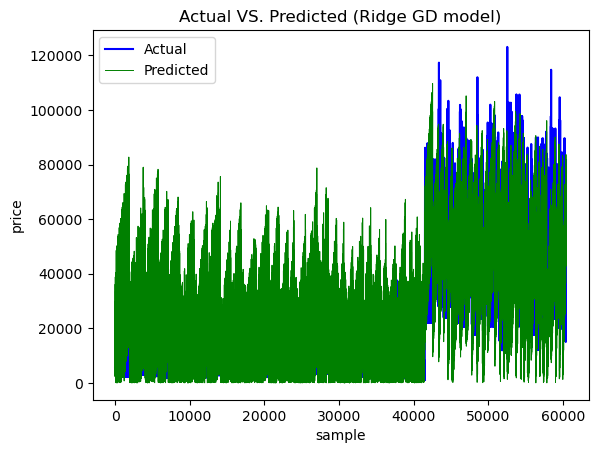

In [107]:
import matplotlib.pyplot as plt

plt.plot(np.array(denorm(test_y)),label = "Actual",c = "b")
plt.plot(np.abs(denorm(model_Ridgegd.predict(test_x))),label = "Predicted",c = "g",linewidth=.7)
plt.xlabel("sample")
plt.ylabel("price")
plt.title("Actual VS. Predicted (Ridge GD model)")
plt.legend()
plt.show()

In [39]:
# saving the Ridge regression Using Gradient Descent model as the pickle file

import pickle
with open('Hasan_Hussain_assignment1_bonus_RidgeGD', 'wb') as files:
    pickle.dump(model_Ridgegd, files)

# Elastic Net Regularization from Scratch

In [40]:
class Elastic:
    
    def __init__(self, alpha):
        self.weight = None
        self.alpha= alpha

    def ols(self,train_x,train_y):
        I=np.identity(train_x.shape[1])
        fir=(np.dot(train_x.T,train_x) + self.alpha*I)
        fir=np.linalg.inv(fir) 
        sec=np.dot(train_x.T,train_y)
        f_weight=np.dot(fir,sec)
        self.weight=f_weight
        return (self.weight)

    def predict(self,test_x):
        y_hat=np.dot(test_x,self.weight.T)
        return (y_hat)

    def ols_los(self,test_x,test_y):
        predicted=self.predict(test_x)
        mse=.5*np.mean(((test_y-predicted)**2) + ((self.alpha/2)*(np.dot(self.weight.T,self.weight))) + ((self.alpha/2)*(np.sum(np.abs(self.weight)))))
        return mse

In [116]:
elastic_loss={}
for i in [.000001,.00001,.001,.1,1]:
    model_Elastic=Elastic(alpha=i)
    model_Elastic.ols(train_x,train_y)
    model_Elastic.predict(test_x)
    elastic_loss[i]=model_Elastic.ols_los(test_x,test_y)
print(f"Best MSE is {min(elastic_loss.values())} for lambda value {min(elastic_loss.keys())}")

Best MSE is 0.0012868250723234856 for lambda value 1e-06


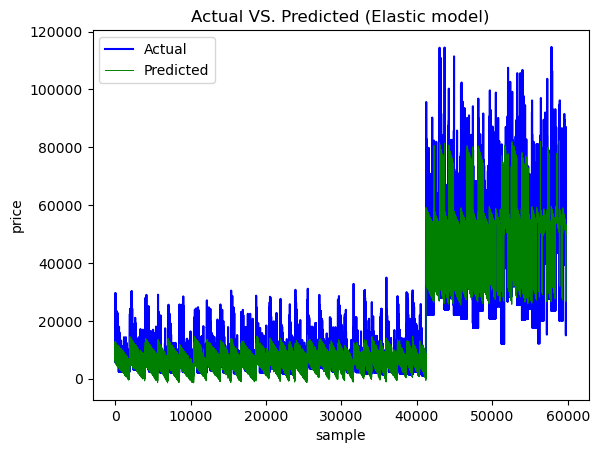

In [49]:
plt.plot(np.array(denorm(test_y)),label = "Actual",c = "b")
plt.plot(denorm(model_Elastic.predict(test_x)),label = "Predicted",c = "g",linewidth=.7)
plt.xlabel("sample")
plt.ylabel("price")
plt.title("Actual VS. Predicted (Elastic model)")
plt.legend()
plt.show()

In [43]:
# saving the Elastic Net regression model as the pickle file

import pickle
with open('Hasan_Hussain_assignment1_bonus_RidgeGD', 'wb') as files:
    pickle.dump(model_Elastic, files)

# Resouces

https://www.geeksforgeeks.org/implementation-of-elastic-net-regression-from-scratch/?ref=rp